In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import seaborn as sns
from sklearn import tree

In [2]:
# data 1°C
data_f_1C = pd.read_csv("Faults/Fault 1C/faulted_1C.csv", index_col=[0])

# data 2°C
data_f_2C = pd.read_csv('Faults/Fault 2C/faulted_2C.csv', index_col=[0])
data_f_2C['Fault'] = 2

# data 4°C
data_f_4C = pd.read_csv('Faults/Fault 4C/faulted_4C.csv', index_col=[0])
data_f_4C['Fault'] = 4

# data -1°C 
data_f_moins1C = pd.read_csv('Faults/Fault -1C/faulted_moins1C.csv', index_col=[0])
data_f_moins1C['Fault'] = -1

# data -2°C 
data_f_moins2C = pd.read_csv('Faults/Fault -2C/faulted_moins2C.csv', index_col=[0])
data_f_moins2C['Fault'] = -2

# data -4°C 
data_f_moins4C = pd.read_csv('Faults/Fault -4C/faulted_moins4C.csv', index_col=[0])
data_f_moins4C['Fault'] = -4

# unfaulted data
data_uf_summer = pd.read_csv('Unfaulted data/unfaulted_summer.csv', index_col=[0])
data_uf_spring = pd.read_csv('Unfaulted data/unfaulted_spring.csv', index_col=[0])
data_uf_winter = pd.read_csv('Unfaulted data/unfaulted_winter.csv', index_col=[0])
data_uf_automn = pd.read_csv('Unfaulted data/unfaulted_automn.csv', index_col=[0])

In [3]:
# data faulted and unfaulted (1°C, 2°C, 4°C, -1°C, -2°C and -4°C)
data = pd.concat([data_f_1C, data_f_2C, data_f_4C, data_f_moins1C, data_f_moins2C, data_f_moins4C, data_uf_summer, data_uf_spring, data_uf_winter, data_uf_automn])
x = data.drop(columns=['Fault', 'Time'])
y = data['Fault']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [5]:
clf = RandomForestClassifier(max_depth=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

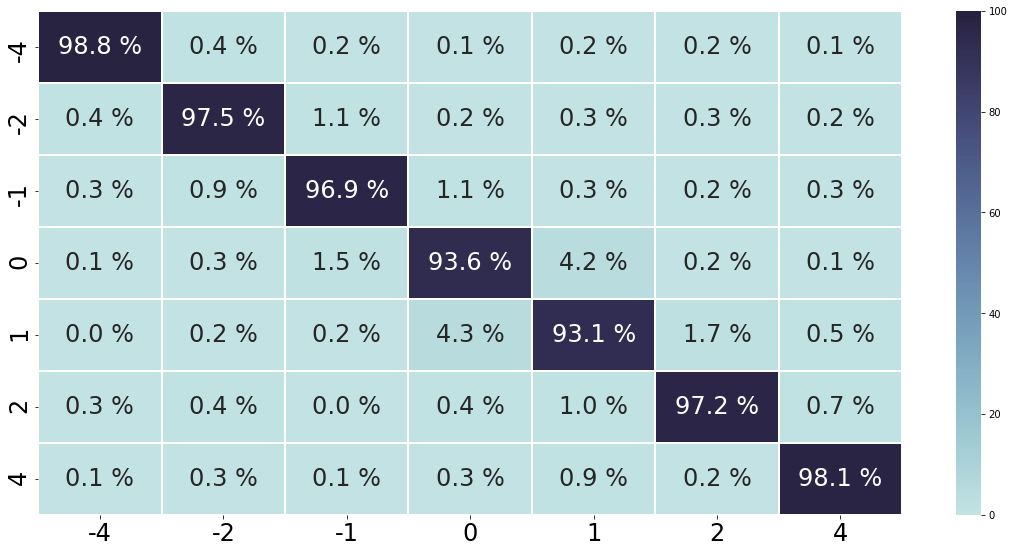

In [24]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0, 0, 1, 1])
cf_matrix = np.matrix([[98.8, 0.4, 0.2, 0.1, 0.2, 0.2, 0.1],
                       [0.4, 97.5, 1.1, 0.2, 0.3, 0.3, 0.2],
                       [0.3, 0.9, 96.9, 1.1, 0.3, 0.2, 0.3],
                       [0.1, 0.3, 1.5, 93.6, 4.2, 0.2, 0.1],
                       [0.0, 0.2, 0.2, 4.3, 93.1, 1.7, 0.5],
                       [0.3, 0.4, 0, 0.4, 1, 97.2, 0.7],
                       [0.1, 0.3, 0.1, 0.3, 0.9, 0.2, 98.1]])
res = heatmap(cf_matrix, annot=True, vmin=0.0,
              vmax=100.0, fmt='.1f', linewidths=0.1,  linecolor='white', annot_kws = {'size':24},
              cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
              yticklabels=[-4, -2, -1, 0, 1, 2, 4], xticklabels=[-4, -2, -1, 0, 1, 2, 4])
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 24)
res.set_yticklabels(res.get_xmajorticklabels(), fontsize = 24)

for t in res.texts: t.set_text(t.get_text() + " %")
    
plt.savefig("Confusion matrix RF", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)   

In [3]:
d =pd.concat([data_f_1C, data_f_2C, data_f_4C, data_f_moins1C, data_f_moins2C, data_f_moins4C, data_uf_automn, data_uf_spring, data_uf_summer, data_uf_winter])

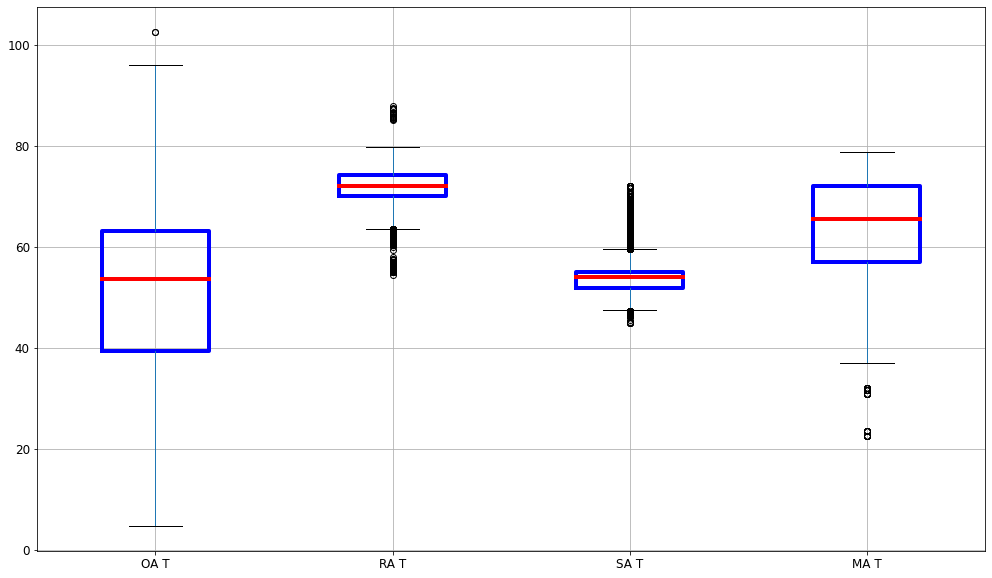

In [19]:
boxprops = dict(linestyle='-', linewidth=4, color='b')
medianprops = dict(linestyle='-', linewidth=4, color='r')
d.boxplot(column=['OA T', 'RA T', 'SA T', 'MA T'], figsize=(17, 10), fontsize='large', boxprops=boxprops,
                medianprops=medianprops, showfliers=True, showmeans=False)
plt.savefig("Outliers_new", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto')   

In [18]:
cf_matrix = np.matrix([[98.8, 0.4, 0.2, 0.1, 0.2, 0.2, 0.1],
                       [0.4, 97.5, 1.1, 0.2, 0.3, 0.3, 0.2],
                       [0.3, 0.9, 96.9, 1.1, 0.3, 0.2, 0.3],
                       [0.1, 0.3, 1.5, 93.6, 4.2, 0.2, 0.1],
                       [0.0, 0.2, 0.2, 4.3, 93.1, 1.7, 0.5],
                       [0.3, 0.4, 0, 0.4, 1, 97.2, 0.7],
                       [0.1, 0.3, 0.1, 0.3, 0.9, 0.2, 98.1]])

In [21]:
cf_matrix.sum(axis=0)

matrix([[100., 100., 100., 100., 100., 100., 100.]])